## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import os
import sys
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

from moviepy.editor import VideoFileClip
from IPython.display import HTML


############################################################################
# This function is used to calibrate the camera and undistort the img
############################################################################
def camera_calibration(cal_img_path):
    '''
        This function is used to calibrate the camera 
        
        Parameters:
            cal_img_path: Path to calibration images
        
            
        Returns: 
            mtx: Camera matrix
            dist: Distortion coefficients
            
            
    '''
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    # Setup object points
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Read in list of calibration images
    images = glob.glob(cal_img_path + '\calibration*.jpg')

    # Loop through each calibration image 
    for img_file in images:
        # Read in image
        img = cv2.imread(img_file)
        
        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # Add object points and image points if corners are found
        if ret == True:
            # Append image points and object points to list
            imgpoints.append(corners)
            objpoints.append(objp)

            # Draw the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
    # Get camera calibration info
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    # Return camera matrix and distortion coefficients
    return mtx, dist


def pipeline():
    pass


### Test camera calibration function

In [ ]:
cal_img_path = '.\camera_cal'
print(cal_img_path)
test_img = '.\camera_cal\calibration1.jpg'
mtx, dist = camera_calibration(cal_img_path)

# Read in a test image
img = cv2.imread(test_img)

# Undistort test image
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Show distorted vs undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

### Gradient and Color Thresholding

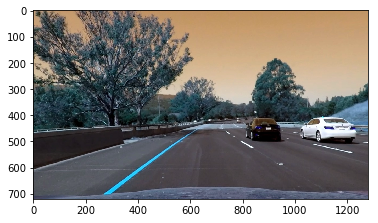

In [15]:
img_path = "test_images"
cal_img_path = '.\camera_cal'

# Read in list of test images
images = glob.glob(os.path.join(img_path,'*.jpg'))

# Calibrate teh camera
#mtx, dist = camera_calibration(cal_img_path)

# Loop through test images
for img_file in images:
    
    # Read image
    img = cv2.imread(img_file)
    
    # Create a copy of the distored image
    dist_img = np.copy(img)
    
    # Undistort test image
    dst = cv2.undistort(dist_img, mtx, dist, None, mtx)
    
    plt.imshow(dst)
    
    
    
    
    


